<a href="https://colab.research.google.com/github/snigdhakakkar/ds-projects/blob/main/ann_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Test if the GPU is running**

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

**Which GPU are you using**

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8625313734695752082
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 320796699824387819
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

**RAM Information**

In [3]:
!cat /proc/meminfo

MemTotal:       13298572 kB
MemFree:         9115368 kB
MemAvailable:   11764896 kB
Buffers:          117468 kB
Cached:          2538720 kB
SwapCached:            0 kB
Active:          1593024 kB
Inactive:        2266936 kB
Active(anon):    1012364 kB
Inactive(anon):     2508 kB
Active(file):     580660 kB
Inactive(file):  2264428 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               288 kB
Writeback:             0 kB
AnonPages:       1203852 kB
Mapped:           700064 kB
Shmem:              3264 kB
KReclaimable:      92036 kB
Slab:             148604 kB
SReclaimable:      92036 kB
SUnreclaim:        56568 kB
KernelStack:        6320 kB
PageTables:        15116 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6649284 kB
Committed_AS:    4333232 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       48028 kB
VmallocChunk:          0 kB
Percpu:          

**CPU Information**

In [4]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

**Running ANN Using Google Colab**

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
!pip install -q keras

In [8]:
import pandas as pd

In [9]:
#Part 1 - Data Preprocessing

#Importing other libraries

import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ANN/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [11]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [12]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [13]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
train_x = np.asarray(X_train)
train_y = np.asarray(y_train)
test_x = np.asarray(X_test)
test_y = np.asarray(y_test)

In [18]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential #creating any model
from keras.layers import Dense #hidden layers
from keras.layers import LeakyReLU,PReLU,ELU #activation functions
from keras.layers import Dropout #regularization parameter

In [19]:
# Initialising the ANN
classifier = Sequential()

In [20]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [21]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [22]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [23]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Fitting the ANN to the Training set
model_history=classifier.fit(train_x, train_y,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 9s 7ms/step - loss: 0.5471 - accuracy: 0.7882 - val_loss: 0.4783 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4614 - accuracy: 0.7962 - val_loss: 0.4534 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4424 - accuracy: 0.7962 - val_loss: 0.4419 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4308 - accuracy: 0.7962 - val_loss: 0.4332 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4219 - accuracy: 0.7962 - val_loss: 0.4270 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4158 - accuracy: 0.7972 - val_loss: 0.4226 - val_accuracy: 0.8141
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4102 - accuracy: 0.8214 - val_loss: 0.4180 - val_accuracy: 0.8186

In [26]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


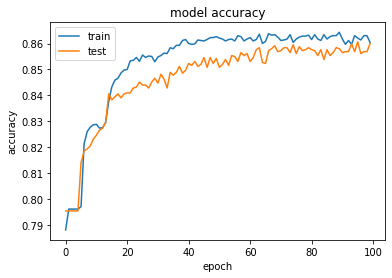

In [27]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

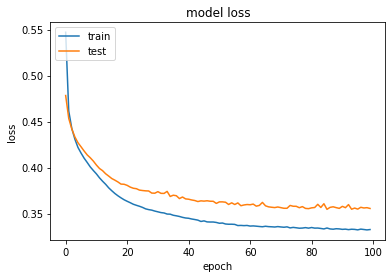

In [28]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(test_x)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,test_y)

In [30]:
cm

array([[1522,   73],
       [ 204,  201]])

In [31]:
score

0.8615